In [1]:
import os
import sys
import importlib
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

In [2]:
project_path = 'C:\\Users\\danny\\Documents_Local\\Caltech_2023-2024\\CS101'

def join_path(relative_path: str) -> str:
    return os.path.join(project_path, relative_path)

def pickle_load(relative_path: str):  # -> pickled_file_contents
    return pickle.load(open(join_path(relative_path), 'rb'))

def pickle_save(obj: object, relative_path: str) -> None:
    pickle.dump(obj, open(join_path(relative_path), 'wb'))

In [3]:
sys.path.append(join_path('EMIT-ECOSTRESS\\modules'))
import datasets.Datasets
import models.Feedforward
import utils.train
import utils.eval

In [4]:
if torch.cuda.is_available():
    device = 'cuda'
else:
    device = 'cpu'
device

'cuda'

In [5]:
base_data_path = 'Data\\Dataset\\Splits'

# load data

emit_train = pickle_load(
    os.path.join(base_data_path, 'reflectance_train_pca244.pkl')
)
emit_val = pickle_load(
    os.path.join(base_data_path, 'reflectance_val_pca244.pkl')
)

elev_train = pickle_load(
    os.path.join(base_data_path, 'elevation_train.pkl')
)
elev_val = pickle_load(os.path.join(base_data_path, 'elevation_val.pkl'))

elev_train = (
    (
        elev_train - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
elev_val = (
    (
        elev_val - np.mean(np.concatenate([elev_train, elev_val], axis=1))
    ) / 
    np.std(np.concatenate([elev_train, elev_val], axis=1))
)
eco_train = pickle_load(os.path.join(base_data_path, 'temp_train.pkl'))
eco_val = pickle_load(os.path.join(base_data_path, 'temp_val.pkl'))

In [7]:
n_components_benchmark_radii = [0, 1, 3]#, 8, 16]
n_components_benchmark_n_components = [1, 2, 3, 4, 8, 16, 32, 64, 128, 244]

radius_benchmark_radii = [0, 1, 2, 3, 4]#, 8, 16]
radius_benchmark_n_components = [8, 16, 32, 64, 244]

benchmark_combos = []
for radius in n_components_benchmark_radii:
    for n in n_components_benchmark_n_components:
        benchmark_combos.append((radius, n))

for radius in radius_benchmark_radii:
    for n in radius_benchmark_n_components:
        if (radius, n) in benchmark_combos:
            continue
        else:
            benchmark_combos.append((radius, n))

len(benchmark_combos)

40

(0, 1) LinearModel(
  (linear_output): Linear(in_features=2, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.2318,  3.6537   	 Val (RMSE, K):  1.2657,  3.3926   	LR:  0.001	Time: 20.7
Epoch 001:     Train (RMSE, K):  0.90875,  2.6956   	 Val (RMSE, K):  1.1158,  2.9908   	LR:  0.001	Time: 21.3
Epoch 002:     Train (RMSE, K):  0.75733,  2.2464   	 Val (RMSE, K):  1.2053,  3.2307   	LR:  0.001	Time: 22.1
Epoch 003:     Train (RMSE, K):  0.75435,  2.2376   	 Val (RMSE, K):  1.1968,  3.2079   	LR:  0.001	Time: 21.1
Epoch 004:     Train (RMSE, K):  0.75203,  2.2307   	 Val (RMSE, K):  1.1945,  3.2017   	LR:  0.001	Time: 20.8
Epoch 005:     Train (RMSE, K):  0.75065,  2.2266   	 Val (RMSE, K):  1.1877,  3.1835   	LR: 0.0002	Time: 19.8
Epoch 006:     Train (RMSE, K):  0.75019,  2.2252   	 Val (RMSE, K):  1.1834,  3.1721   	LR: 0.0002	Time: 19.7
Epoch 007:     Train (RMSE, K):  0.74973,  2.2239   	 Val (RMSE, K):  1.1822,  3.1688   	LR: 0.0002	Time: 19.9
Epoch 008:     Train (R

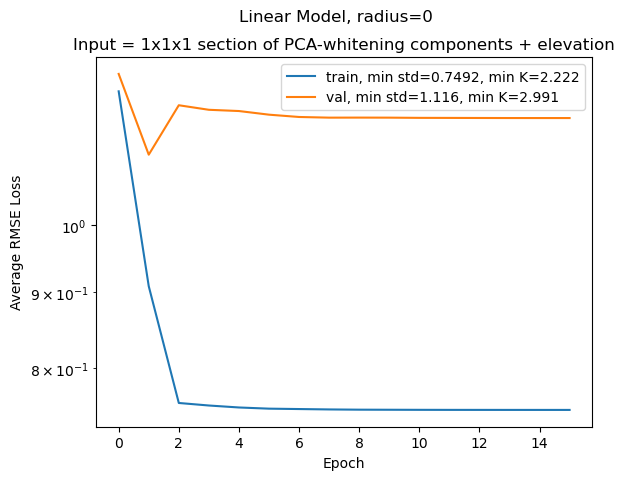

(0, 2) LinearModel(
  (linear_output): Linear(in_features=3, out_features=1, bias=True)
)
Epoch 000:     Train (RMSE, K):  1.0335,  3.0655   	 Val (RMSE, K):  1.1956,  3.2048   	LR:  0.001	Time: 19.5
Epoch 001:     Train (RMSE, K):  0.80128,  2.3768   	 Val (RMSE, K):  1.1959,  3.2056   	LR:  0.001	Time: 19.8
Epoch 002:     Train (RMSE, K):  0.75127,  2.2284   	 Val (RMSE, K):  1.1855,  3.1776   	LR:  0.001	Time: 19.9
Epoch 003:     Train (RMSE, K):  0.74823,  2.2194   	 Val (RMSE, K):  1.1694,  3.1344   	LR:  0.001	Time: 21.5
Epoch 004:     Train (RMSE, K):  0.74434,  2.2079   	 Val (RMSE, K):  1.1511,  3.0854   	LR:  0.001	Time: 24.1
Epoch 005:     Train (RMSE, K):  0.74018,  2.1955   	 Val (RMSE, K):  1.1352,  3.0428   	LR:  0.001	Time: 23.5
Epoch 006:     Train (RMSE, K):  0.73625,  2.1839   	 Val (RMSE, K):  1.1061,  2.9647   	LR:  0.001	Time: 19.7
Epoch 007:     Train (RMSE, K):  0.73279,  2.1736   	 Val (RMSE, K):  1.0994,  2.9469   	LR:  0.001	Time: 19.7
Epoch 008:     Train (R

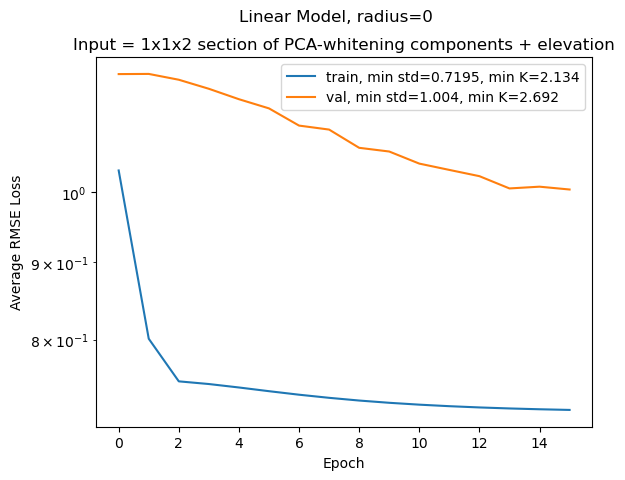

(0, 3) LinearModel(
  (linear_output): Linear(in_features=4, out_features=1, bias=True)
)


In [10]:
importlib.reload(datasets.Datasets)
importlib.reload(models.Feedforward)
importlib.reload(utils.train)
importlib.reload(utils.eval)

batch_size = 256
val_batch_size = 1024

n_epochs = 15
dropout_rate = 0

stats_list = []
train_loss_array_list = []
val_loss_array_list = []
train_loss_list = []
val_loss_list = []

stats = None
try:
    for combo in benchmark_combos:
        radius, n = combo

        omit_components = 244 - n

        # create datasets and dataloaders

        train_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_train,
            omit_components=omit_components,
            ecostress_data=eco_train,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_train,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        val_dataset = datasets.Datasets.PatchToPixelDataset(
            emit_data=emit_val,
            omit_components=omit_components,
            ecostress_data=eco_val,
            ecostress_center=None,
            ecostress_scale=None,
            additional_data=(elev_val,),
            radius=radius,
            boundary_width=max(
                [benchmark_combos[i][0] for i in range(len(benchmark_combos))]
            ),
        )

        if batch_size is not None:
            train_loader = DataLoader(
                dataset=train_dataset,
                batch_size=batch_size,
                drop_last=False,
                shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset,
                batch_size=val_batch_size,
                drop_last=False,
                shuffle=False,
            )
        else:
            train_loader = DataLoader(
                dataset=train_dataset, batch_size=batch_size, shuffle=True,
            )
            val_loader = DataLoader(
                dataset=val_dataset, batch_size=batch_size, shuffle=False,
            )
            
        
        model = models.Feedforward.LinearModel(
            input_dim=train_dataset.input_dim,
            radius=radius,
            dropout_rate=dropout_rate,
        )
        
        if device == 'cuda':
            model = model.cuda()

        optimizer = optim.Adam(
            params=model.parameters(), lr=0.001, weight_decay=0, fused=True
        )

        scheduler = optim.lr_scheduler.ReduceLROnPlateau(
            optimizer=optimizer, factor=0.2, patience=2
        )

        loss_fn = nn.MSELoss(reduction='sum')

        print(combo, model)
        
        train_loss, val_loss, eval_stats, train_loss_array, val_loss_array = (
            utils.train.train(
                model,
                optimizer,
                scheduler,
                loss_fn,
                train_loader,
                val_loader,
                n_epochs=n_epochs,
                loss_interval=1,
                # preexisting_losses=[train_loss, val_loss],
                device=device,
            )
        )
        
        eval_stats = np.concatenate([np.array(combo), eval_stats])
        stats_list.append(eval_stats)
        train_loss_array_list.append(train_loss_array)
        val_loss_array_list.append(val_loss_array)
        train_loss_list.append(train_loss)
        val_loss_array_list.append(val_loss)
        
        
        fig, ax = plt.subplots()
        fig.suptitle(
            f'Linear Model, radius={radius}'
        )
        l = 2 * radius + 1
        ax.set_title(
            f'Input = {l}x{l}x{244 - omit_components} section of '
            'PCA-whitening components + elevation'
        )
        ax.semilogy(
            np.arange(len(train_loss)),
            train_loss,
            label=(
                'train, '
                f'min std={min(train_loss):.4}, '
                f'min K={train_dataset.ecostress_scale * min(train_loss):.4}'
            ),
        )
        ax.semilogy(
            np.arange(len(val_loss)),
            val_loss,
            label=(
                'val, '
                f'min std={min(val_loss):.4}, '
                f'min K={val_dataset.ecostress_scale * min(val_loss):.4}'
            ),
        )
        ax.set_xlabel('Epoch')
        ax.set_ylabel('Average RMSE Loss')
        ax.legend()
        plt.show(fig)
        
        torch.save(
            model.state_dict(),
            join_path(f'Data\\Models\\linear_r{radius}_n{n}.pt')
        )
        
    stats = np.array(stats_list)
    stats_columns = utils.eval.initialize_eval_results().columns.to_list()
    stats = pd.DataFrame(stats, columns=stats_columns)
    stats['radius'] = stats['radius'].astype(int)
    stats['n_components'] = stats['n_components'].astype(int)
        
except KeyboardInterrupt:
    print('Training was interrupted by user')

stats

In [ ]:
stats.iloc[:, [0,1,28]]

,radius,n_components,val_avg_std
0,0,1,1.300211
1,0,2,1.206317
2,0,3,1.085852
3,0,4,1.016816
4,0,8,0.895112
5,0,16,0.911128
6,0,32,0.937054
7,0,64,1.049855
8,0,128,1.091402
9,0,244,1.043508


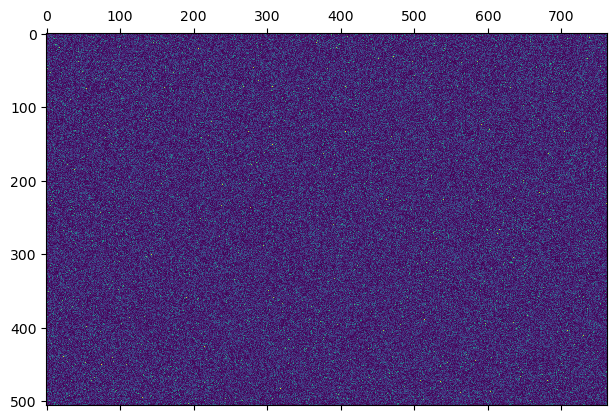

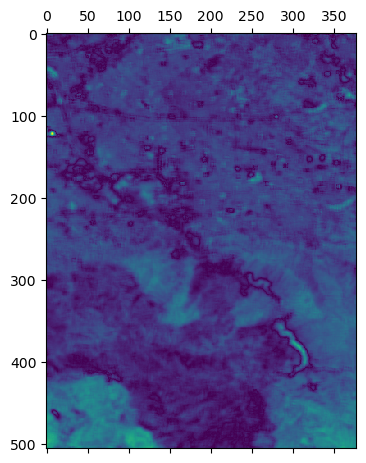

In [8]:
plt.matshow(train_loss_array)
plt.matshow(val_loss_array)